# Final Project 1 : Linear Regression

- Celin Manongko - PYTN-KS10-018
- Alina Florencia Karuniawati - PYTN-KS10-001
- Nine Alvariqati Varqa Ansori - PYTN-KS10-010

## Import Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.diagnostic import normal_ad
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## Data Loading

In [2]:
df = pd.read_csv("rideshare_kaggle.csv")
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


## Background Analysis

Uber dan Lyft merupakan dua jenis transportasi online yang banyak digunakan oleh masyarakat Boston, America. Untuk mengetahui bagaimana persaingan dari kedua jenis transportasi tersebut, kita akan melakukan analisis terkait dengan permintaan dan harga dari Uber dan Lyft untuk mengetahui transportasi mana yang lebih diminati oleh masyarakat setempat. Selain itu, pada analisis ini juga akan dianalisis faktor-faktor yang memengaruhi harga dari kedua jenis transportasi tersebut guna melakukan prediksi harga dari Uber dan Lyft menggunakan regresi linear.

## Data Shape

In [3]:
df.shape

(693071, 57)

Data ini terdiri dari 693.071 baris dan 57 kolom

## Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari informasi di atas, dapat diketahui fitur yang numerical (hour, day, month, price, distance, dsb) dan categorical (cab_type, name, short_summary, dsb). 

## Data Cleaning

### Check Duplicated Data

In [5]:
df.duplicated().sum()

0

Berdasarkan hasil di atas, tidak ada data yang duplikat

### Remove Unnecessary Column

Pada tahap ini, kami hanya mengambil beberapa kolom saja yang akan digunakan untuk analisis dan pemodelan menggunakan regresi linear

Kolom yang di drop:
- id: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft
- timestamp: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft
- datetime: tidak digunakan karena sudah ada penjabaran di kolom day, hour, dan month 
- timezone: tidak digunakan karena hanya ada berisikan data yang homogen (America/New York)
- product_id: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft
- latitude dan longitude: tidak digunakan karena tidak ada keterangan jelas terkait latitude & longitude itu merupakan latitude & longitude source atau destination
- temperatureHigh, temperatureLow, apparentTemperatureLow, apparentTemperature, apparentTemperatureHigh, apparentTemperatureMin, apparentTemperatureMax: : tidak digunakan karena kita memutuskan untuk mengambil rata-rata temperature yang tercermin dari kolom temperature
- precipIntensity: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft
- precipProbability: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft
- windGust: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft
- windGustTime: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft
- icon: tidak digunakan karena isi dari kolomnya telah terwakili oleh short_summary
- dewpoint: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft
- windBearing: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft
- long_summary: tidak digunakan karena isi dari kolomnya telah terwakili oleh short_summary
- humidity: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft
- windSpeed: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft
- visibility dan visibility.1: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft
- pressure: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft
- cloudCover: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft
- uvIndex: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft
- ozone: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft
- sunriseTime: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft
- moonPhase: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft
- precipIntensityMax: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft
- uvIndexTime: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft
- temperatureHighTime, temperatureLowTime, apparentTemperatureHighTime, apparentTemperatureLowTime, apparentTemperatureMaxTime, apparentTemperatureMinTime: tidak digunakan karena tidak relevan dengan analisis yang dilakukan terhadap harga uber dan lyft

Karena kolom-kolom yang tidak relevan dengan analisis yang akan dilakukan didrop, maka kolom yang akan kami gunakan adalah sebagai berikut:
1. hour: merupakan jam ketika pemesanan uber dan lyft dilakukan oleh customer (digunakan karena dugaan awal pada jam-jam tertentu harga dari uber dan lyft akan mengalami peningkatan, seperti pada saat pulang kerja)
2. month: merupakan bulan ketika pemesanan uber dan lyft dilakukan oleh customer (digunakan karena dugaan awal pada bulan-bulan tertentu harga dari uber dan lyft terjadi penurunan atau peningkatan)
3. source: merupakan lokasi dimana customer melakukan pemesanan uber dan lyft (digunakan untuk melakukan analisis lokasi-lokasi yang memiliki demand tinggi terkait dengan tempat pemesanan uber dan lyft)
4. destination: merupakan tujuan dari customer uber dan lyft (digunakan untuk melakukan analisis terhadap lokasi-lokasi yang sering dituju oleh customer uber dan lyft)
5. cab_type: merupakan jenis taxi yang digunakan, yaitu uber atau lyft (digunakan karena dugaan awal kedua jenis taxi ini memiliki harga yang berbeda sehingga dapat memengaruhi harga dari taxi yang dipesan)
6. price: merupakan harga 
7. distance: merupakan jarang dari source ke destination (digunakan karena secara umum jarak memengaruhi fare dari taxi)
8. surge_multiplier: pengali untuk harga standar (digunakan karena multiplier berpengaruh terhadap harga)
9. temperature: suhu (digunakan karena dugaan awal temperature memengaruhi harga dari uber atau lyft)
10. short_summary: cuaca (digunakan karena dugaan awal cuaca memengaruhi harga dari uber atau lyft)
11. name: jenis mobil yang digunakan (digunakan karena jenis mobil dapat memengaruhi harga dari uber atau lyft)
12. day: merupakan tanggal dari pemesanan uber dan lyft yang dilakukan oleh customer (digunakan karena dugaan awal tanggal dapat memengaruhi harga dari Uber dan Lyft)

In [6]:
df1 = df[['name','day','hour', 'month', 'source', 'destination', 'cab_type', 'price', 'distance','surge_multiplier','temperature','short_summary']]
df1

,name,day,hour,month,source,destination,cab_type,price,distance,surge_multiplier,temperature,short_summary
0,Shared,16,9,12,Haymarket Square,North Station,Lyft,5.0,0.44,1.0,42.34,Mostly Cloudy
1,Lux,27,2,11,Haymarket Square,North Station,Lyft,11.0,0.44,1.0,43.58,Rain
2,Lyft,28,1,11,Haymarket Square,North Station,Lyft,7.0,0.44,1.0,38.33,Clear
3,Lux Black XL,30,4,11,Haymarket Square,North Station,Lyft,26.0,0.44,1.0,34.38,Clear
4,Lyft XL,29,3,11,Haymarket Square,North Station,Lyft,9.0,0.44,1.0,37.44,Partly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...
693066,UberXL,1,23,12,West End,North End,Uber,13.0,1.00,1.0,37.05,Partly Cloudy
693067,UberX,1,23,12,West End,North End,Uber,9.5,1.00,1.0,37.05,Partly Cloudy
693068,Taxi,1,23,12,West End,North End,Uber,NaN,1.00,1.0,37.05,Partly Cloudy
693069,Black SUV,1,23,12,West End,North End,Uber,27.0,1.00,1.0,37.05,Partly Cloudy


### Check Missing Value

In [7]:
df1.isnull().sum()

name                    0
day                     0
hour                    0
month                   0
source                  0
destination             0
cab_type                0
price               55095
distance                0
surge_multiplier        0
temperature             0
short_summary           0
dtype: int64

Dari pengecekan di atas masih terdapat missing values pada kolom price

In [8]:
for col in df1:
    print("Nilai unik dalam kolom: ", col.upper())
    print(df1[col].unique())

Nilai unik dalam kolom:  NAME
['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']
Nilai unik dalam kolom:  DAY
[16 27 28 30 29 17 26  2  3 13 14  1 18 15  4 10  9]
Nilai unik dalam kolom:  HOUR
[ 9  2  1  4  3 18  5 19  6 10 16 22 23  0 14 11  7 20 13  8 12 21 17 15]
Nilai unik dalam kolom:  MONTH
[12 11]
Nilai unik dalam kolom:  SOURCE
['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']
Nilai unik dalam kolom:  DESTINATION
['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']
Nilai unik dalam kolom:  CAB_TYPE
['Lyft' 'Uber']
Nilai unik dalam kolom:  PRICE
[ 5.   11.    7.   26.    9.   16.5  10.5   3.   27.5  13.5  12.   16.
  7.5

Dari pengecekan di atas, terdapat nan pada kolom price. Kemudian, untuk kolom-kolom lain tidak terdapat nilai yang aneh.

### Persentase Missing Value

In [9]:
100*55095/len(df1)

7.949402009317948

Persentase missing value hanya sebesar 7.949%. Olehh karena itu, kami memutuskan untuk langsung membuang missing value tersebut karena data yang bersifat missing value persentasenya tidak besar

## Remove Missing Values

In [10]:
df1.dropna(inplace=True)

In [11]:
df1.isnull().sum()

name                0
day                 0
hour                0
month               0
source              0
destination         0
cab_type            0
price               0
distance            0
surge_multiplier    0
temperature         0
short_summary       0
dtype: int64

Dapat dilihat bahwa missing value di kolom price telah berhasil dibuang

## Central Tendency

Pada analisis statistik ini, kami ingin mengetahui persebaran data dari kolom distance karena secara umum distance dapat dikatakan sebagai faktor yang memengaruhi harga dari sebuah taxi online. Seperti yang diketahui bahwa semakin dekat jarak ke tempat tujuan, maka tarif dari taxi online pun juga semakin murah, begitu juga sebaliknya.

### Mean

In [12]:
print('Rata-rata distance:',df1.distance.mean())

Rata-rata distance: 2.189261100730992


### Median 

In [13]:
print('Median dari distance:',df1.distance.median())

Median dari distance: 2.16


### Mode

In [14]:
print('Mode dari distance:',df1.distance.mode()[0])

Mode dari distance: 2.66


## Measure of Spread

### Range

In [15]:
print('Range dari distance:',df1.distance.max()-df1.distance.min())

Range dari distance: 7.840000000000001


### Standard Deviation

In [16]:
print('Standard deviation dari distance:',df1.distance.std())

Standard deviation dari distance: 1.1354130181864042


### Variance

In [17]:
print('Variance dari distance:',df1.distance.var())

Variance dari distance: 1.28916272186716


## Exploratory Data Analysis

### Demand Analysis

In [18]:
plt.style.use("fivethirtyeight")

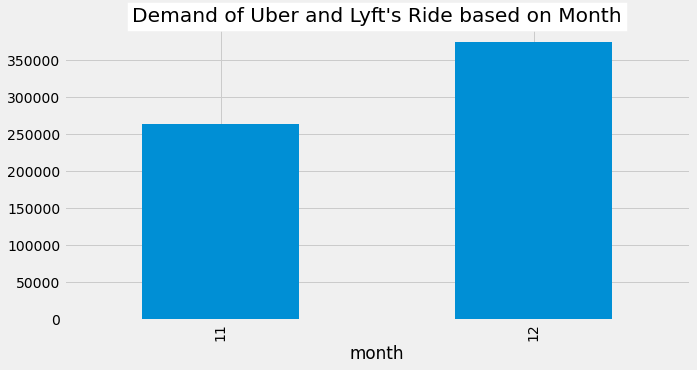

In [19]:
df1gr = df1[['month']].groupby(['month']).agg({'month':'count'})
df1gr.plot(kind='bar', legend=False, figsize=(10,5))
plt.title("Demand of Uber and Lyft's Ride based on Month", bbox={'facecolor':'1', 'pad':5})
plt.show()

Berdasarkan visualisasi di atas dapat dilihat bahwa demand untuk Uber and Lyft lebih banyak pada bulan December apabila dibandingkan dengan bulan November. Hal ini dapat disebabkan karena pada bulan December sudah memasuki winter holidays, sehingga banyak masyarakat Boston yang bepergian ke luar.

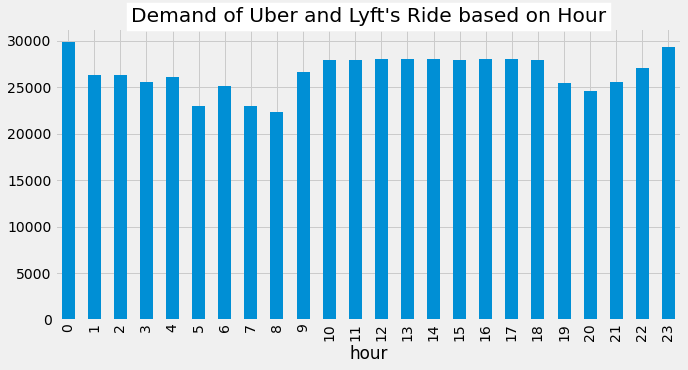

In [20]:
df2gr = df1[['hour']].groupby(['hour']).agg({'hour':'count'})
df2gr.plot(kind='bar', legend=False, figsize=(10,5))
plt.title("Demand of Uber and Lyft's Ride based on Hour", bbox={'facecolor':'1', 'pad':5})
plt.show()

Berdasarkan visualisasi di atas permintaan terhadap Uber dan Lyft lebih banyak di sekitar jam 00:00 (12 malam). Selain itu, dari bar chart di atas juga dapat dilihat bahwa pada jam 10:00 hingga 18:00 jumlah permintaan dari customer cenderung sama

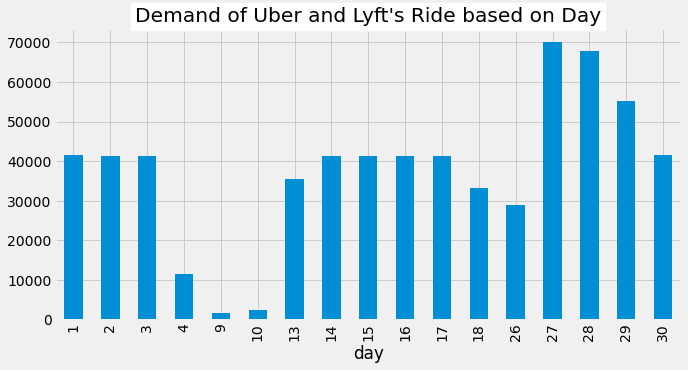

In [21]:
df77gr = df1[['day']].groupby(['day']).agg({'day':'count'})
df77gr.plot(kind='bar', legend=False, figsize=(10,5))
plt.title("Demand of Uber and Lyft's Ride based on Day", bbox={'facecolor':'1', 'pad':5})
plt.show()

Permintaan pada pemesanan Uber dan Lyft yang paling tinggi pada bulan November dan Desember ada di akhir bulan, yaitu setiap tanggal 27 hingga 29.

### Price Analysis

$H_0$ : **`The Prices of Uber and Lyft are normally distributed`** <br>
$H_1$ : **`The Prices of Uber and Lyft are not normally distributed`** <br>

In [22]:
p_value = normal_ad(df1['price'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

if p_value < 0.05:
    print('Prices of Uber and Lyft are not normally distributed')
else:
    print('Prices of Uber and Lyft are  normally distributed')

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0
Prices of Uber and Lyft are not normally distributed


$H_0$ ditolak karena p-value dari Anderson Darling test di bawah 0.05, sehingga dapat disimpulkan bahwa harga dari Uber dan Lyft tidak berdistribusi normal

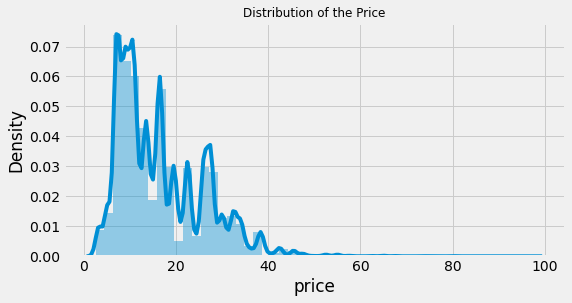

In [23]:
plt.subplots(figsize=(8, 4))
plt.title('Distribution of the Price', fontsize=12)
sns.distplot(df1['price'])
plt.show()

In [24]:
print('Average price:', df1.price.mean())
print('Standart deviation price:', df1.price.std())

Average price: 16.545125490614065
Standart deviation price: 9.324358581419423


Berdasarkan plot di atas dapat dilihat bahwa distribusi harga dari Uber dan Lyft tergolong sebagai right skewed dengan rata-rata sebesar 16.545 dan standard deviasi sebesar 9.324. Oleh karena itu dapat dikatakan bahwa harga dari Uber dan Lyft berada pada range [7.221,25.869] (didapatkan melalui [Mean - std, Mean + std])

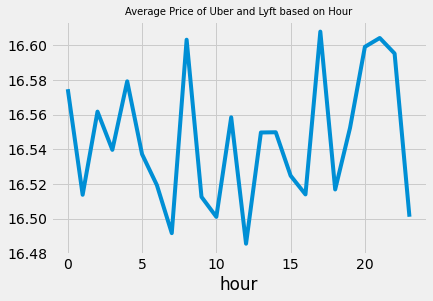

In [25]:
df5gr = df1[['hour','price']].groupby(['hour']).agg({'price':'mean'})
df5gr.plot(kind='line', legend=False)
plt.title("Average Price of Uber and Lyft based on Hour", fontsize=10)
plt.show()

Berdasarkan line chart di atas, rata-rata harga tertinggi Uber dan Lyft berada saat jam 17.00 dengan rata-rata harga sebesar 16.607996. Sedangkan harga dengan rata-rata terendah, yaitu pada jam 23:00

In [26]:
df7gr = df1[['price','source','destination']].groupby(['source','destination']).agg({'price':'mean'})
with pd.option_context('display.max_rows', None,):
    print(df7gr)

                                                     price
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.1460

In [27]:
df7gr.price.max()

25.498434004474273

Rute dengan rata-rata harga termahal adalah dari Financial District menuju Boston University dengan rata-rata harga sebesar 25.498

### Source and Destination Analysis

#### Source

In [28]:
df1.source.value_counts().head(5)

Financial District    54197
Back Bay              53201
Theatre District      53201
Boston University     53172
North End             53171
Name: source, dtype: int64

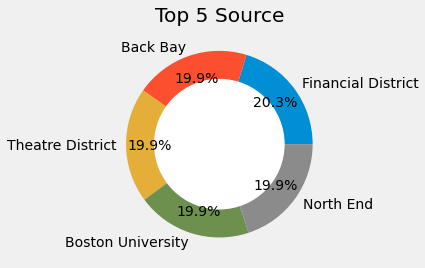

In [29]:
label = ['Financial District','Back Bay','Theatre District','Boston University','North End']

plt.pie(df1.source.value_counts().head(5), labels = label, autopct='%1.1f%%', pctdistance=0.75)

center_circle = plt.Circle((0,0),0.70, fc='white')

fig = plt.gcf()

fig.gca().add_artist(center_circle)

plt.title("Top 5 Source")

plt.show()

Berdasarkan data di atas sebagian customer naik Uber dan Lyft dari Financial District dengan persentase sebesar 20.3%.

#### Destination

In [30]:
df1.destination.value_counts().head(5)

Financial District    54192
Back Bay              53190
Theatre District      53189
Haymarket Square      53171
Boston University     53171
Name: destination, dtype: int64

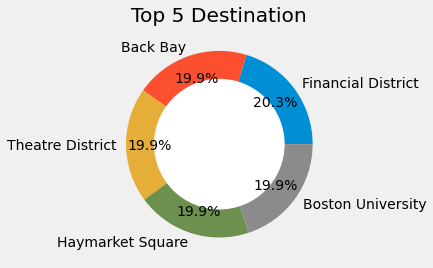

In [31]:
label = ['Financial District','Back Bay','Theatre District','Haymarket Square','Boston University']

plt.pie(df1.destination.value_counts().head(5), labels = label, autopct='%1.1f%%', pctdistance=0.75)

center_circle = plt.Circle((0,0),0.70, fc='white')

fig = plt.gcf()

fig.gca().add_artist(center_circle)

plt.title("Top 5 Destination")

plt.show()

Secara umum, banyak customer dari uber dan lyft yang melakukan pemesanan dengan tujuan ke Financial District dengan persentase sebesar 20.3%

Setelah mengetahui tujuan dari customer uber dan lyft secara keseluruhan, selanjutnya, kita akan melakukan analisis terhadap destination yang paling banyak dituju oleh customer yang naik Uber dan Lyft dari Financial District (destinasi awal yang paling banyak).

In [32]:
df_fd = df1[df1['source']=='Financial District']

In [33]:
df_fd.destination.value_counts()

South Station              9534
Haymarket Square           9329
Boston University          8940
Fenway                     8928
Northeastern University    8868
North End                  8598
Name: destination, dtype: int64

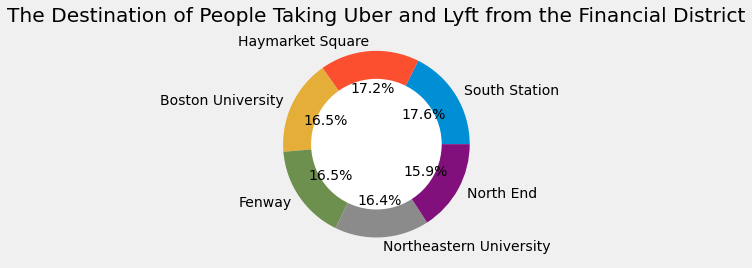

In [34]:
label = ['South Station','Haymarket Square','Boston University','Fenway','Northeastern University','North End']

plt.pie(df_fd.destination.value_counts(), labels = label, autopct='%1.1f%%')

center_circle = plt.Circle((0,0),0.70, fc='white')

fig = plt.gcf()

fig.gca().add_artist(center_circle)

plt.title("The Destination of People Taking Uber and Lyft from the Financial District")

plt.show()

Destinasi yang paling banyak dituju oleh orang yang naik Uber dan Lyft dari Financial District adalah South Station

### Uber vs Lyft

#### Demand

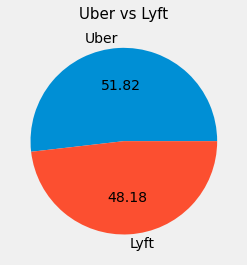

In [35]:
df1.cab_type.value_counts().plot(kind='pie', autopct='%.2f')
plt.title("Uber vs Lyft", fontsize=15)
plt.ylabel('')
plt.show()

Berdasarkan pie chart di atas Uber memiliki demand yang lebih tinggi daripada lyft

Text(0.5, 1.0, 'Demand Uber vs Lyft based on Month')

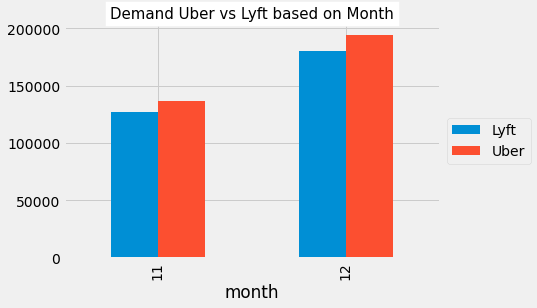

In [36]:
df3gr = df1[['cab_type','month']].groupby(['cab_type','month']).agg({'month':'count'})
df3gr.unstack(level=0).plot(kind='bar')
plt.legend(['Lyft','Uber'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Demand Uber vs Lyft based on Month',fontsize=15,bbox={'facecolor':'1', 'pad':5})

Uber memiliki demand yang lebih tinggi daripada Lyft baik di bulan November maupun di bulan Desember

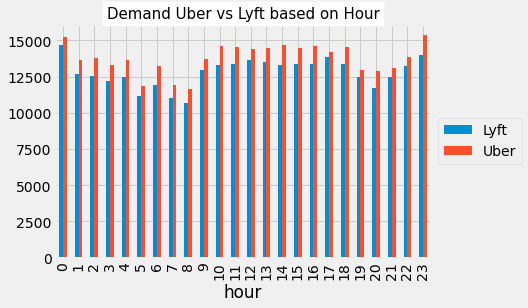

In [37]:
df4gr = df1[['cab_type','hour']].groupby(['cab_type','hour']).agg({'hour':'count'})
df4gr.unstack(level=0).plot(kind='bar')
plt.legend(['Lyft','Uber'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Demand Uber vs Lyft based on Hour',fontsize=15,bbox={'facecolor':'1', 'pad':5})
plt.show()

Di setiap jamnya, Uber memiliki permintaan yang lebih tinggi daripada Lyft. Permintaan Uber paling banyak di jam 23:00, sedangkan untuk permintaan Lyft paling banyak di jam 00:00 (12 malam)

#### Price

In [38]:
df8 = df1[df1['cab_type']=='Uber']
df9 = df1[df1['cab_type']=='Lyft']

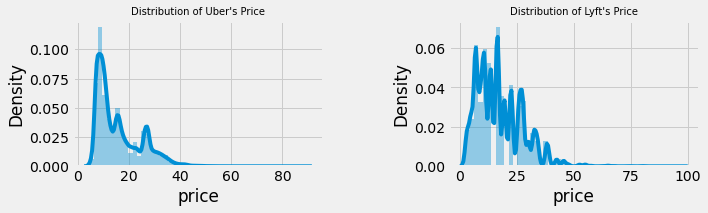

In [39]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=.5, wspace=.5)

ax = fig.add_subplot(3,2,1)
sns.distplot(df8['price'])
ax.set_title("Distribution of Uber's Price", fontsize=10)

ax = fig.add_subplot(3,2,2)
sns.distplot(df9['price'])
ax.set_title("Distribution of Lyft's Price", fontsize=10)

plt.show()

**Distribusi dari harga Uber dan Lyft tergolong right skewed apabalia dilihat berdasarkan plot di atas**

In [40]:
print('Average price of Uber:', df8.price.mean())
print('Standart deviation price of Uber:', df8.price.std())

print('Average price of Lyft:', df9.price.mean())
print('Standart deviation price of Lyft:', df9.price.std())

Average price of Uber: 15.795343166912708
Standart deviation price of Uber: 8.560299982017439
Average price of Lyft: 17.351396125019512
Standart deviation price of Lyft: 10.019170761821647


- Rata-rata harga dari Uber adalah 15.795 dengan standar deviasi sebesar 8.56. Artinya, persebaran harga dari Uber berada di antara [7.235, 24.355]. (dihitung menggunakan [mean - std, mean + std]
- Rata-rata harga dari Lyft adalah 17.351 dengan standar deviasi sebesar 10.019. Artinya, persebaran harga dari Lyft berada di antara [7.332, 27.37]. (dihitung menggunakan [mean - std, mean + std]


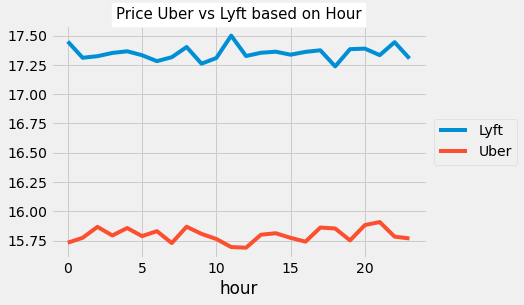

In [41]:
df6gr = df1[['cab_type','hour','price']].groupby(['cab_type','hour']).agg({'price':'mean'})
df6gr.unstack(level=0).plot(kind='line')
plt.legend(['Lyft','Uber'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Price Uber vs Lyft based on Hour',fontsize=15,bbox={'facecolor':'1', 'pad':5})
plt.show()

Dari visualisasi di atas dapat ditarik beberapa insight:
1. Harga Uber cenderung lebih murah daripada Lyft di setiap jamnya, sehingga permintaan Uber lebih banyak daripada Lyft
2. Rata-rata harga Uber yang paling tinggi yaitu pada jam 21:00 dengan nilai sebesar 15.9
3. Rata-rata harga Lyft yang paling tinggi yaitu pada jam 11:00 dengan nilai sebesar 17.5
4. Rata-rata harga Lyft yang paling rendah yaitu pada jam 18:00 dengan nilai sebesar 17.2
5. Rata-rata harga Uber yang paling rendah yaitu pada jam 12:00 dengan nilai sebesar 15.69

## Correlation between Variables

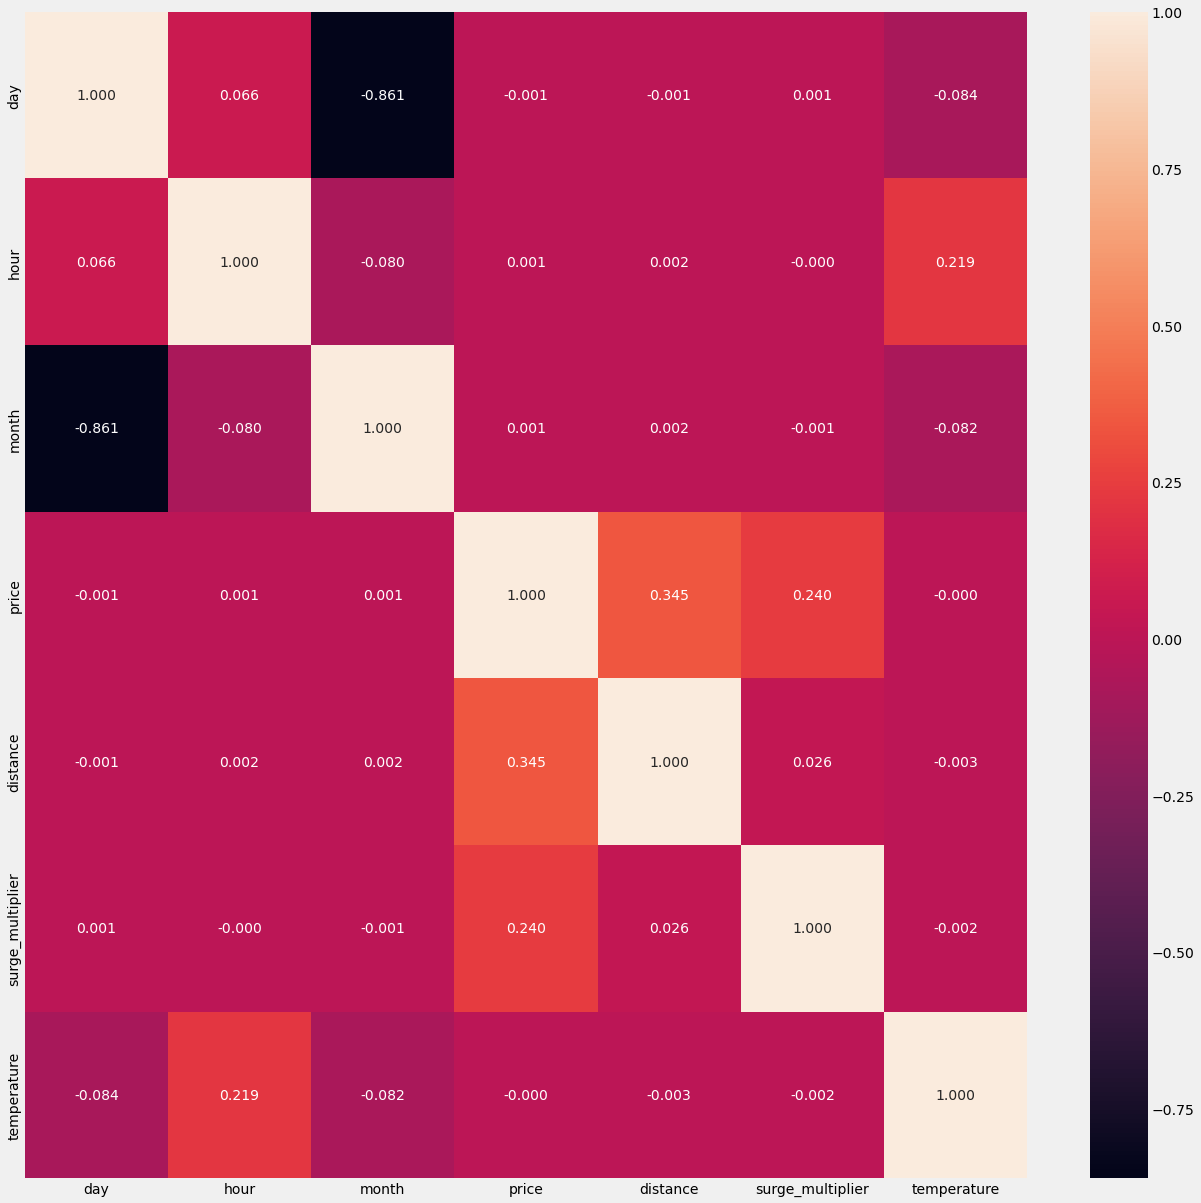

In [42]:
fig = plt.figure(figsize=(20, 20))
sns.heatmap(df1.corr(), annot=True, fmt=".3f")
plt.show()

Berdasarkan heatmap di atas variabel numerik yang memiliki korelasi yang cukup kuat dengan variabel price adalah surge_multiplier dan distance. Oleh karena itu, variabel numerik yang akan digunakan sebagai variabel independen adalah distance dan surge multiplier. 

## Check Multicollinearity

Multikolinearitas merupakan uji untuk mengecek apakah suatu variabel independen dapat diprediksi dari variabel independen lainnya.

In [43]:
def calc_vif(x):
    vif = pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
    return vif

In [44]:
iv = df1[['surge_multiplier','distance']]
calc_vif(iv)

,Variables,VIF
0,surge_multiplier,4.610678
1,distance,4.610678


Tidak terdapat multikolinearitas antar variabel independen yang bersifat numerik karena vif dari kedua variabel numerik tersebut di bawah 5.

## Label Encoding

Selanjutnya, kita akan mengubah data-data yang bersifat categorical menjadi numerical untuk dapat digunakan sebagai fitur untuk regresi linear.

In [45]:
df1 = df1[['distance','surge_multiplier','price','cab_type','name','short_summary']]

In [46]:
categorical = df1[['cab_type','name','short_summary']]

In [47]:
for catcol in categorical:
    dummies = pd.get_dummies(df1[catcol], prefix=catcol, drop_first=True)
    df1 = pd.concat([df1, dummies], axis=1)
    df1 = df1.drop([catcol], axis = 1)

In [48]:
df1

,distance,surge_multiplier,price,cab_type_Uber,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,...,name_UberXL,name_WAV,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,0.44,1.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.44,1.0,11.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.44,1.0,7.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.44,1.0,26.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.44,1.0,9.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,1.0,9.5,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
693066,1.00,1.0,13.0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
693067,1.00,1.0,9.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
693069,1.00,1.0,27.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Data Pre-Processing

### Split Data

Untuk melakukan modelling kita akan membagi data menjadi dua, yaitu data training dengan persentase sebesar 75% dan data testing dengan persentase sebesar 25%.

In [49]:
train, test = train_test_split(df1, test_size=0.25, random_state=42)
train_index = train.index
test_index = test.index

In [50]:
y_train = train[['price']]
X_train = train.drop(['price'], axis=1)

In [51]:
y_test = test[['price']]
X_test = test.drop(['price'], axis=1)

### Scale Data

Kita akan melakukan proses standardization terhadap data train dan testing agar mean tiap kolom menjadi sama dengan nol dan std tiap kolom menjadi satu

In [52]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [53]:
X_test = scaler.transform(X_test)

## Modelling

Dalam pemodelan ini digunakan Regresi Linear karena kita melakukan prediksi harga berdasarkan data historical yang diketahui, seperti distance, surge_multiplier, name, cab_type, dan short_summary.

In [54]:
LR = LinearRegression()
model = LR.fit(X_train, y_train)

### Intercept and Slope

In [55]:
print('intercept:', model.intercept_[0])

intercept: 16.543485470819277


In [56]:
print('slope:', model.coef_)

slope: [[ 3.17462082e+00  1.74322398e+00  4.04270847e+10  2.74577639e+00
   2.19796602e+10  2.19493228e+10  2.20073305e+10  2.20352118e+10
   2.19749566e+10  2.19770473e+10 -3.30524118e+00 -3.01531925e+00
  -1.35739693e+00 -3.01933291e+00  7.51578361e-03 -3.82727085e-03
   1.34700677e-03  2.51776830e-03 -1.98871728e-03  7.93535084e-04
   6.61033551e-04  2.69073534e-03]]


### Model Evaluation

#### Accuracy (R-squared) for Testing Data

In [57]:
Rsquared = model.score(X_test,y_test)
Rsquared

0.9274155604533441

#### Accuracy (R-squared) for Testing Data

In [58]:
Rsquared1 = model.score(X_train,y_train)
Rsquared1

0.9272250052428115

#### Comparison Between Testing and Training Data

In [59]:
compared_model = pd.DataFrame({'Keterangan':['Testing Data','Training Data'],
                               'Accuracy':[Rsquared, Rsquared1]})
compared_model

,Keterangan,Accuracy
0,Testing Data,0.927416
1,Training Data,0.927225


Berdasarkan perbandingan di atas dapat dikatakan bahwa model ini tergolong overfitting karena akurasi dari testing data lebih tinggi daripada training data, meskipun selisih akurasinya tidak begitu jauh.

# Conclusion

1. Demand terhadap Uber lebih banyak daripada Lyft pada tahun 2018 karena memiliki harga yang cenderung lebih murah untuk setiap jamnya.
2. Destinasi awal yang merupakan tempat dimana penumpang memesan atau menaiki Uber dan Lyft paling banyak adalah dari Financial District dan dari Financial District banyak penumpang yang memiliki tujuan ke South Station.
3. Rute dengan rata-rata harga termahal adalah rute yang berasal dari Financial District menuju Boston University dengan rata-rata harga sebesar 25.498.
4. Jumlah permintaan Uber dan Lyft lebih banyak di sekitar jam 00:00 (12 malam) dan tren jumlah permintaan Uber dan Lyft untuk jam 10:00 hingga 18:00 cenderung sama.
5. Di bulan Desember jumlah permintaan Uber dan Lyft cenderung lebih banyak daripada di bulan November. Hal ini dikarenakan Desember merupakan bulan winter holiday season di Boston, America. 
6. Rata-rata harga dari Uber adalah 15.795 dengan standar deviasi sebesar 8.56. Artinya, persebaran harga dari Uber berada di antara [7.235, 24.355]. Sementara itu, rata-rata harga dari Lyft adalah 17.351 dengan standar deviasi sebesar 10.019. Artinya, persebaran harga dari Lyft berada di antara [7.332, 27.37]. 
7. Berdasarkan hasil dari linear regresi didapatkan akurasi sebesar 92,72% untuk data training. Artinya, 92,72% variabel dependen (price) dapat direpresentasikan oleh variabel dependen (distance, surge_multiplier, cab_type, name, short_summary). Selain itu, model ini juga dapat dikatakan baik untuk digunakan dalam prediksi harga taxi online (Uber dan Lyft) karena akurasinya mendekati 100%.